## Regression between atmospheric contribution to SLH and AMV resulting from observational data

In this notebook a regression is performed between the atmospheric contribution to sea level rise at the Dutch coast as has been calculated using three different regression models (Nearest point, Timmerman and Dangendorf). These models show a contribution to sea level rise at the Dutch coast which is varying over time. The aim of regressing this to the AMV is to understand the relation between the varying contribution of wind to sea level rise and the AMV.


As a low pass filter, to both datasets the LOWESS method is applied. 


It is a bit sad that the AMV time series are already detrended so we cannot find conclusion about long-term systematic changes.


In [4]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/AMV/code')

import import_data as imprt
import regression as regr
import figures as fig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import and plot wind contribution to sea level data

The annual data has been detrended

In [5]:
df_era5, df_20cr = imprt.import_obs_ac_slh_data()


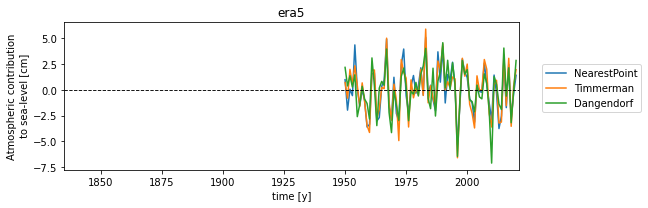

In [39]:
fig.plot_df_timeseries(df_era5, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'era5')


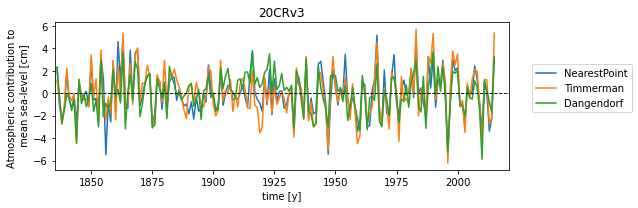

In [7]:
fig.plot_df_timeseries(df_20cr, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3')



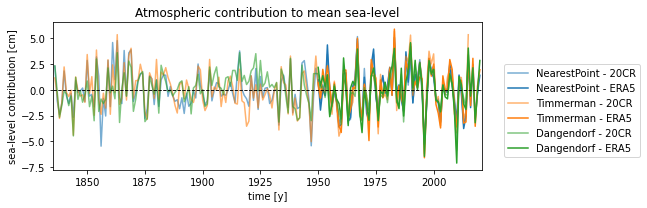

In [10]:
fig.plot_era5_20cr_timeseries(df_era5, df_20cr)

### Import and plot AMV data

There are three observational SST products: HadiSST, COBE and ERSST
whereof the deseasonalized, detrended data is imported

In [12]:
AMV_data = imprt.import_AMV_data()

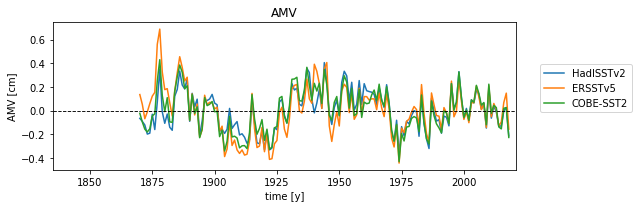

In [13]:
fig.plot_df_timeseries(AMV_data, ylabel = 'AMV [cm]', title = 'AMV')



### Perform regression for 21y window


A lagged regression is performed between each AMV time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 21 y window

In [24]:
df_era5_21, df_20cr_21 = imprt.import_obs_ac_slh_data(smoothed = True)
AMV_data_21 = imprt.import_AMV_data(smoothed = True)

#### Plot regression input

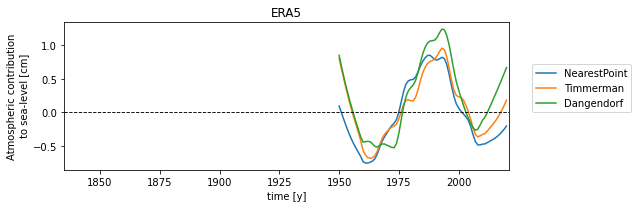

In [40]:
fig.plot_df_timeseries(df_era5_21, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'ERA5')


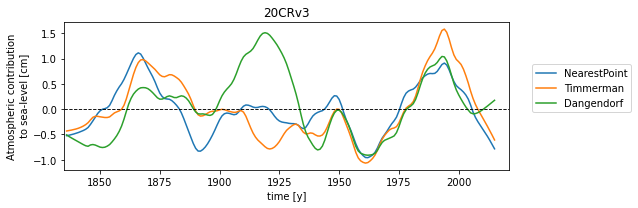

In [41]:
fig.plot_df_timeseries(df_20cr_21, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3')



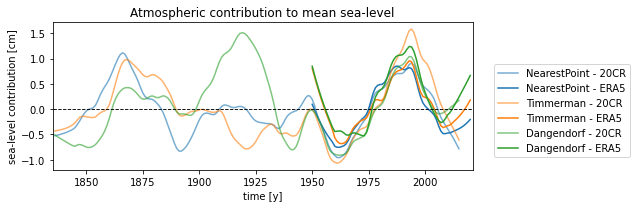

In [25]:
fig.plot_era5_20cr_timeseries(df_era5_21, df_20cr_21)

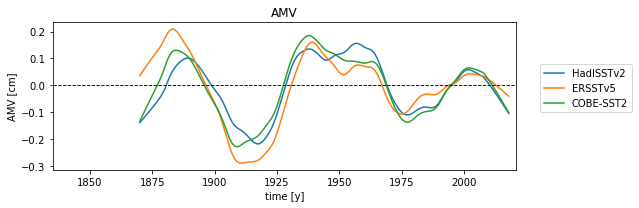

In [26]:
fig.plot_df_timeseries(AMV_data_21, ylabel = 'AMV [cm]', title = 'AMV')



#### Perform regression

In [73]:
results_era5_21, timeseries_era5_21 = regr.lagged_regression(AMV_data_lo, df_era5_lo)
results_20cr_21, timeseries_20cr_21 = regr.lagged_regression(AMV_data_lo, df_20cr_lo)

#### Show regression results

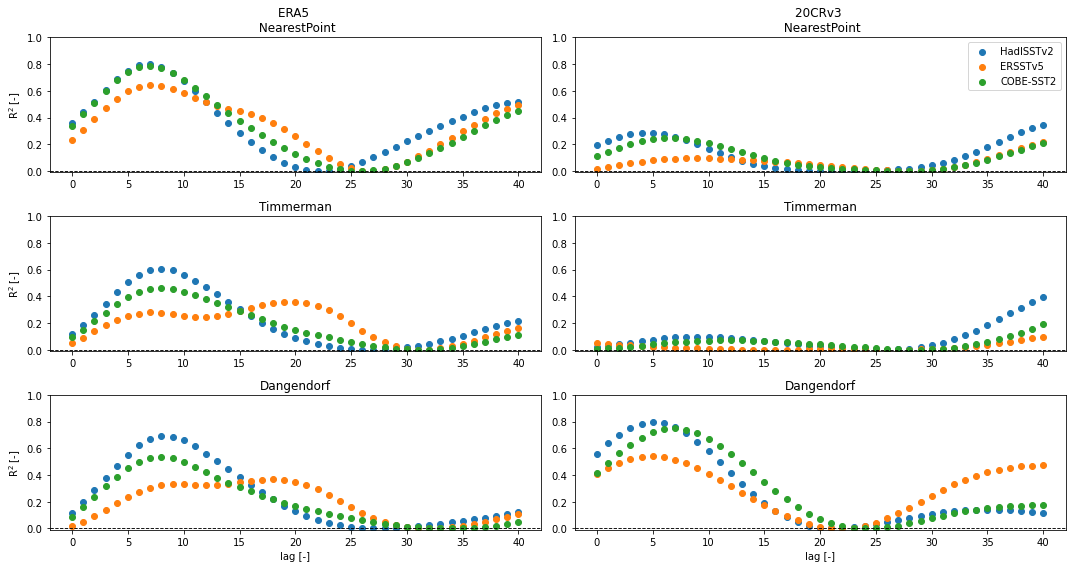

In [74]:
fig.plot_result(results_era5_21, results_20cr_21, 'r$^2$', 'R$^2$ [-]', ymax = 1.0)

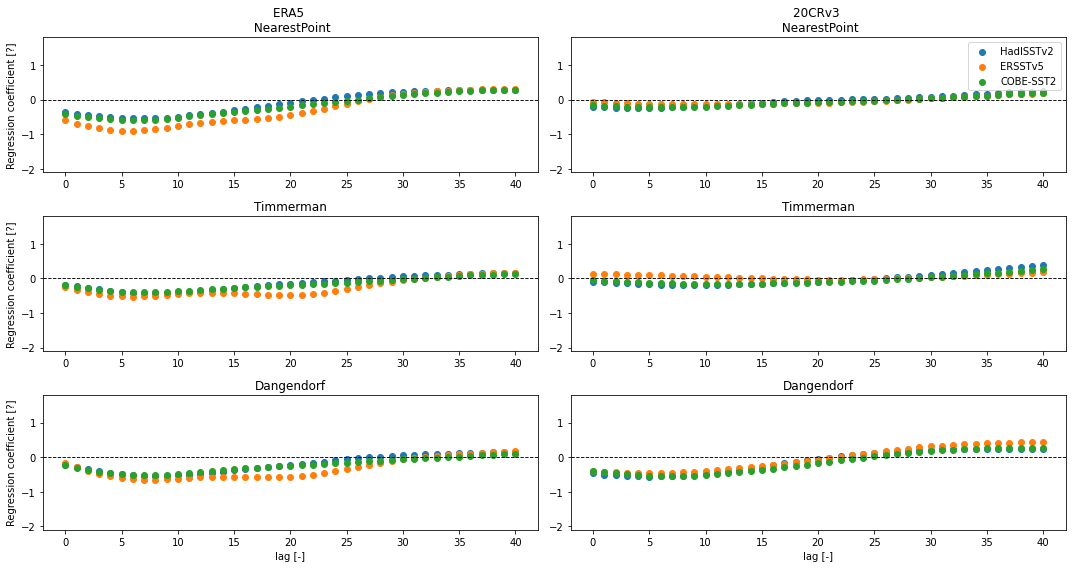

In [75]:
fig.plot_result(results_era5_21, results_20cr_21, 'coef', 'Regression coefficient [?]', ymin = -2.1, ymax = 1.8)

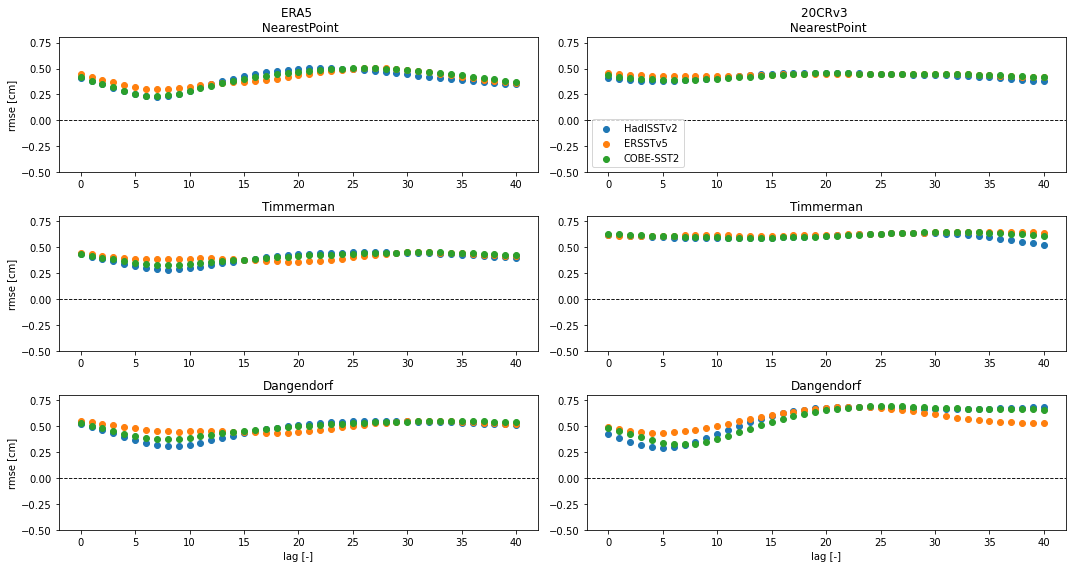

In [76]:
fig.plot_result(results_era5_21, results_20cr_21, 'rmse', 'rmse [cm]', ymin = -0.5, ymax = 0.8)

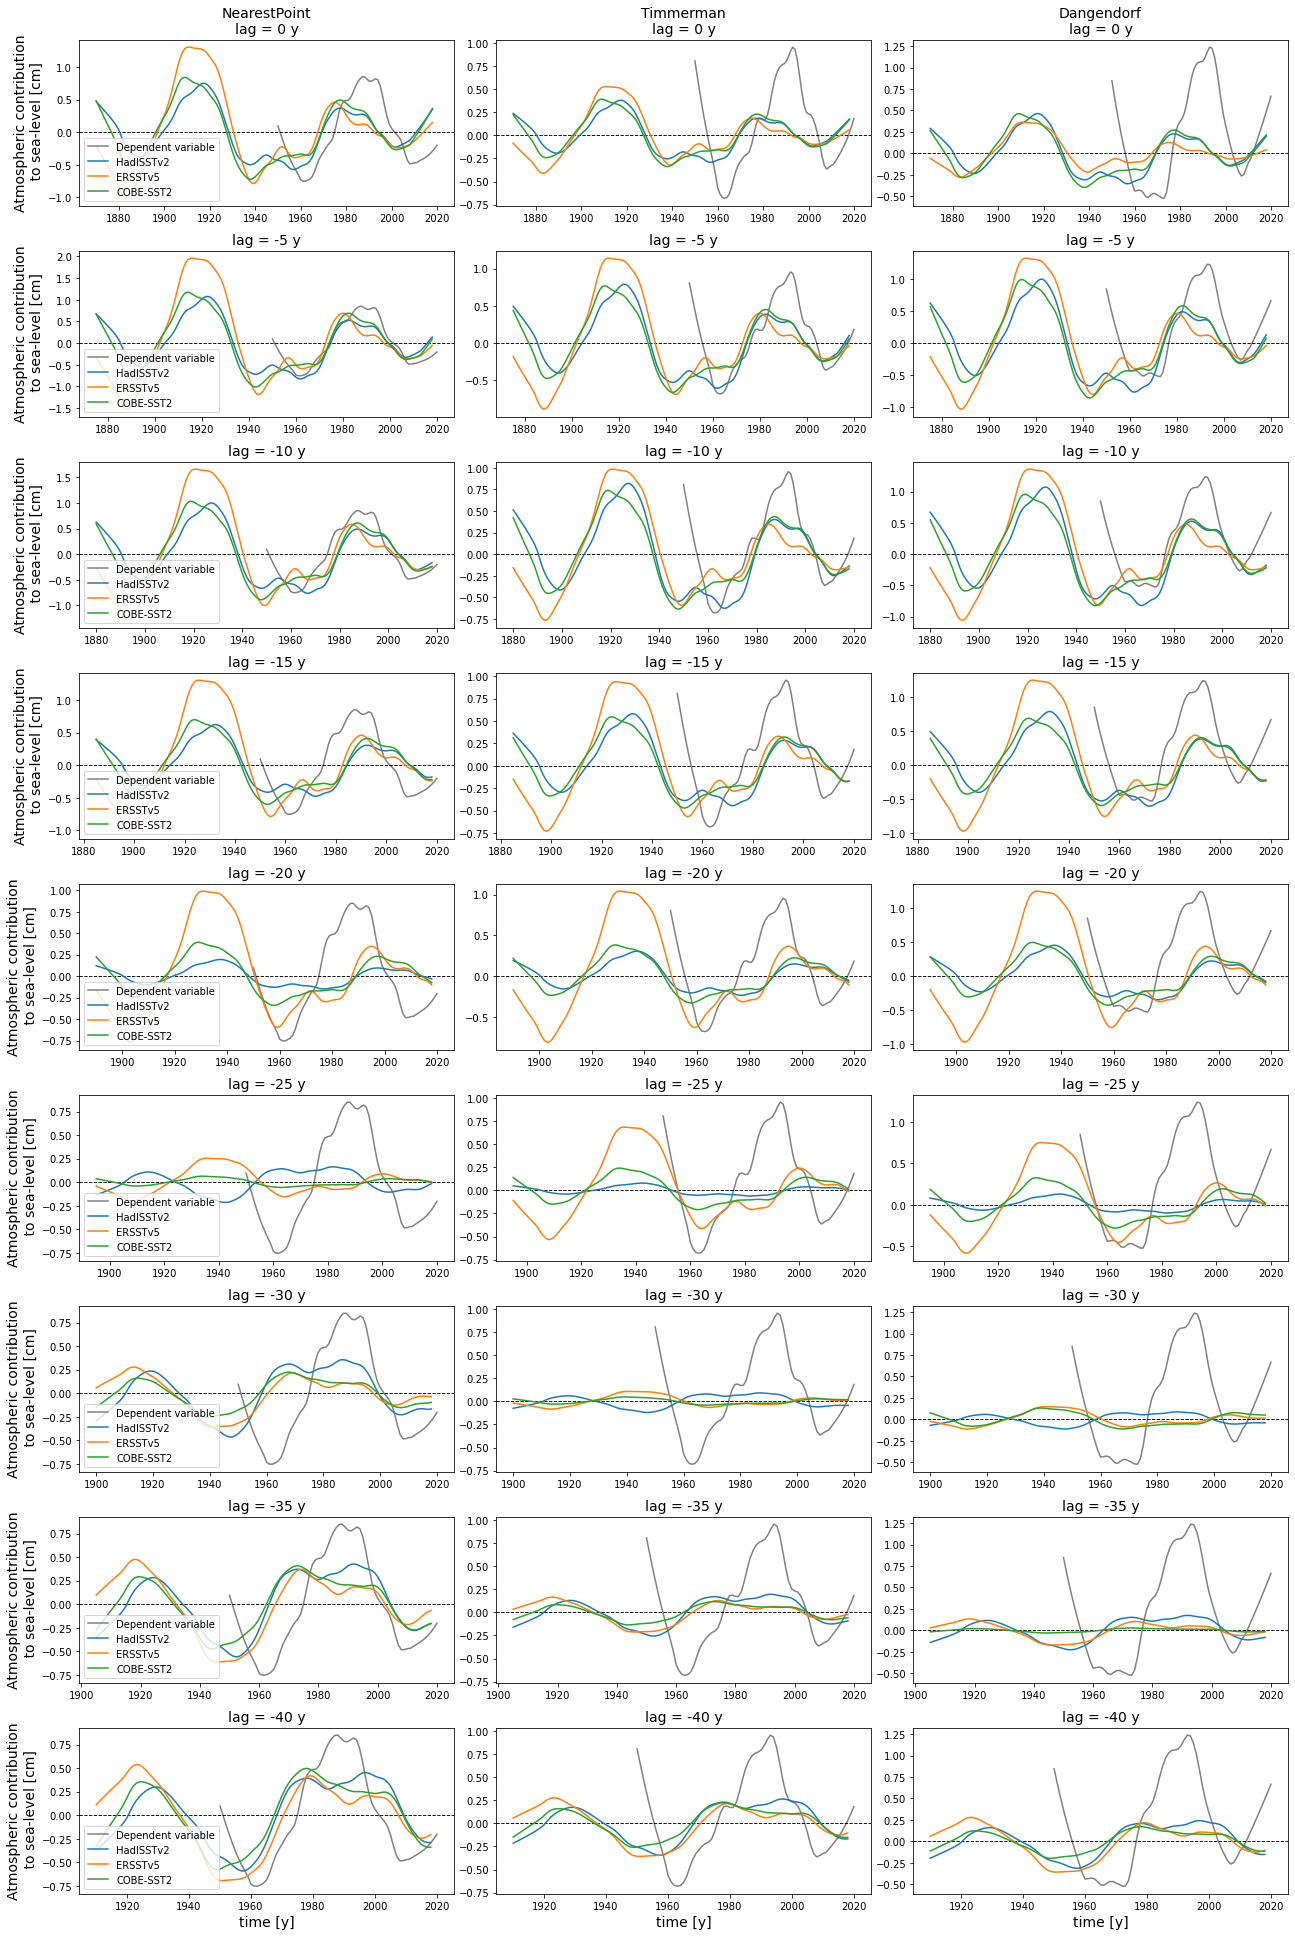

In [80]:
fig.plot_timeseries(timeseries_era5_21, df_era5_21, [0, 5, 10, 15, 20, 25, 30, 35, 40], data_type='era5')

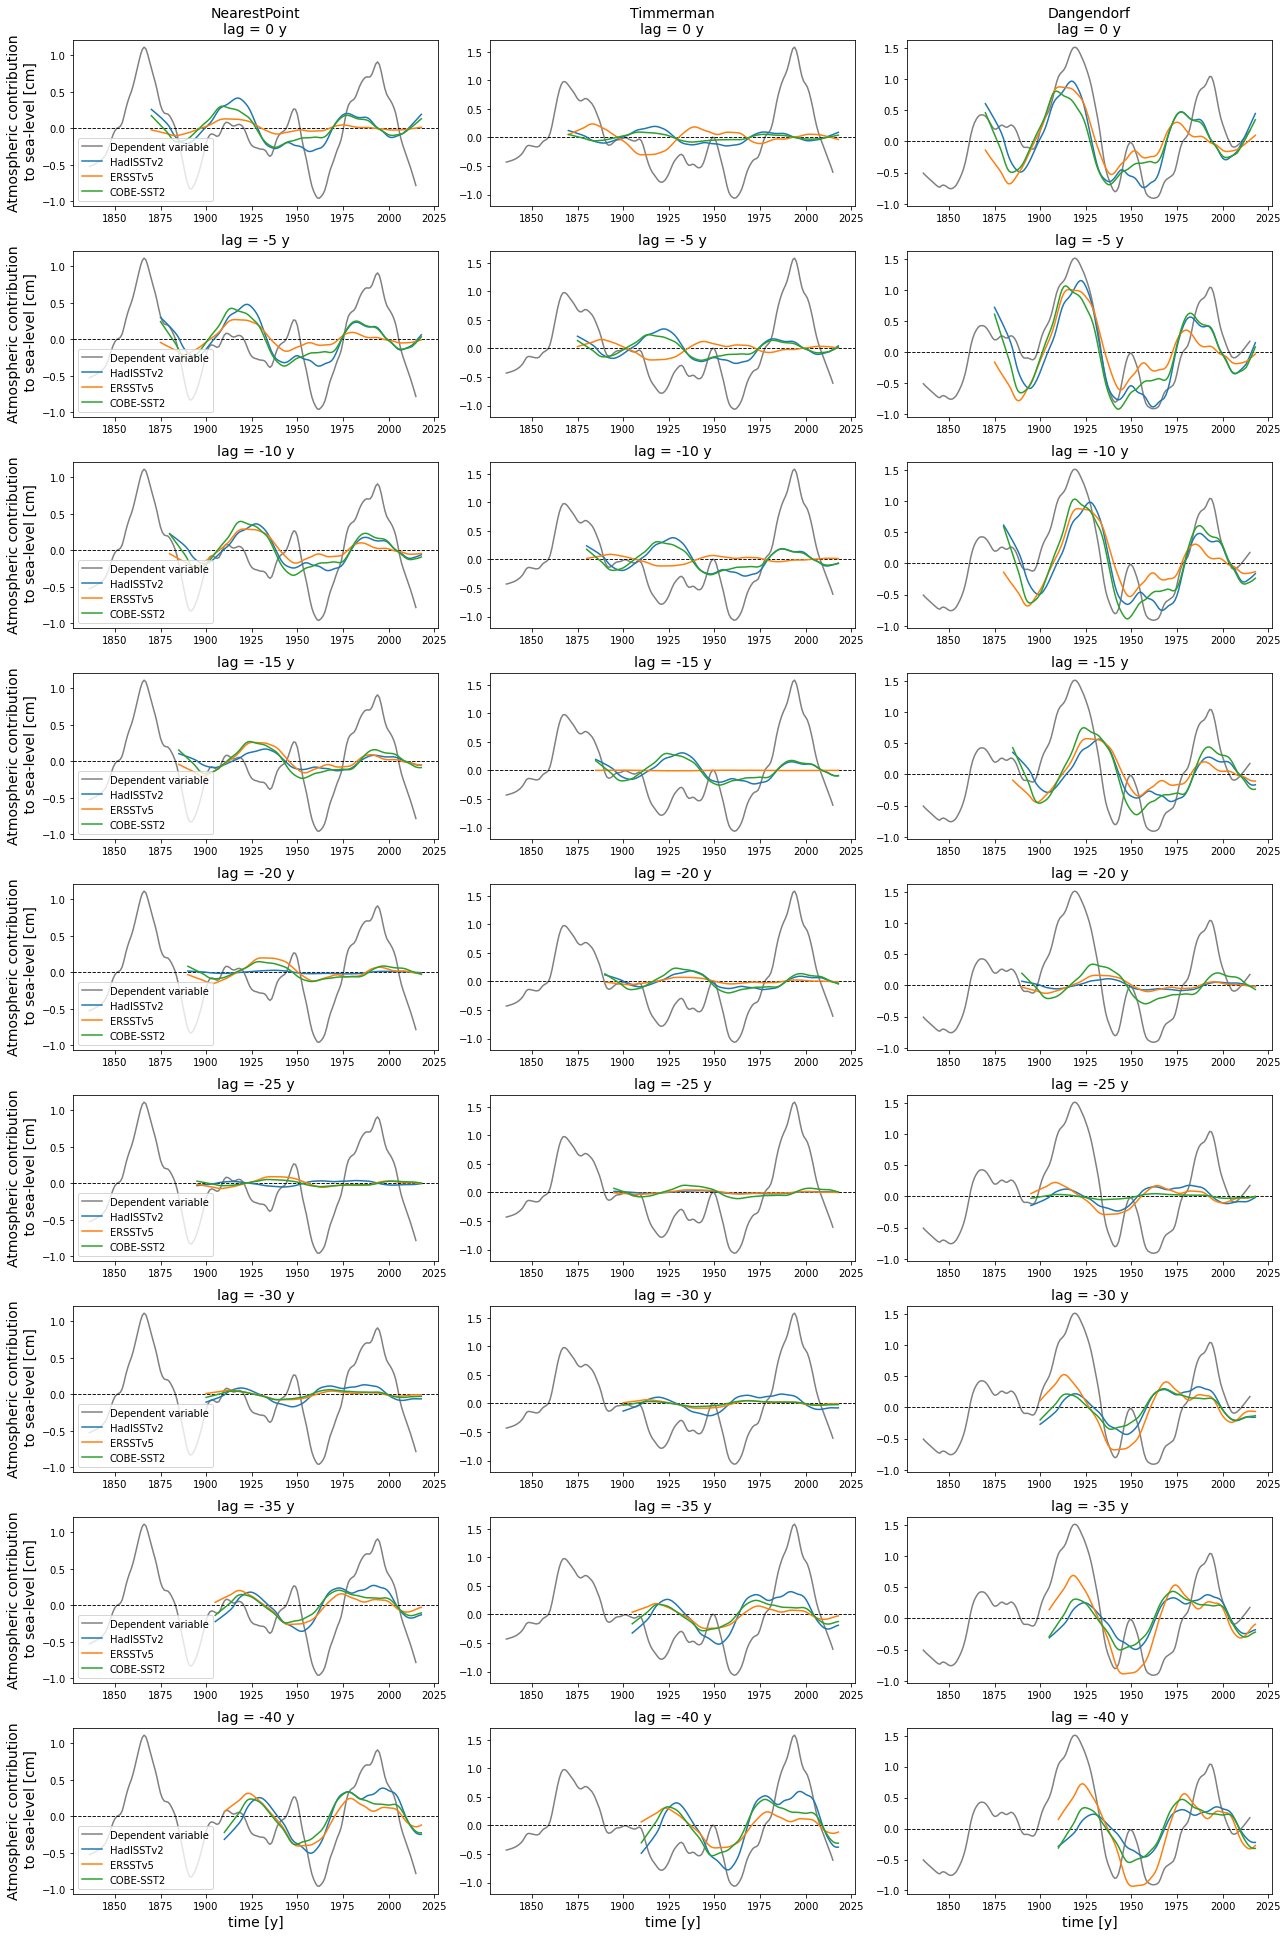

In [81]:
fig.plot_timeseries(timeseries_20cr_21, df_20cr_21, [0, 5, 10, 15, 20, 25, 30, 35, 40], data_type='20cr')

### Perform regression for 31y window


A lagged regression is performed between each AMV time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 21 y window

In [82]:
df_era5_31, df_20cr_31 = imprt.import_obs_ac_slh_data(smoothed = True, window = 31)
AMV_data_31 = imprt.import_AMV_data(smoothed = True, window = 31)

#### Plot regression input

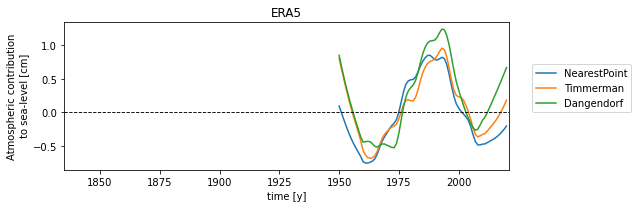

In [40]:
fig.plot_df_timeseries(df_era5_31, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'ERA5', window = 31)


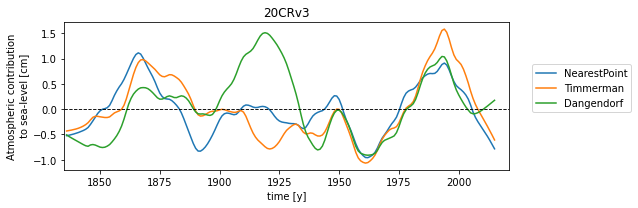

In [41]:
fig.plot_df_timeseries(df_20cr_31, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3', window = 31)



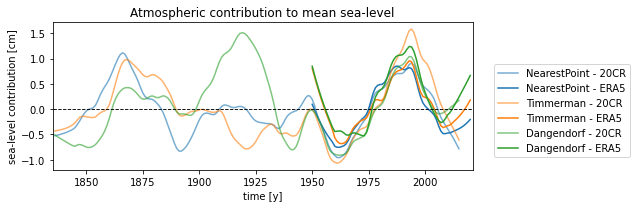

In [25]:
fig.plot_era5_20cr_timeseries(df_era5_31, df_20cr_31, window = 31)

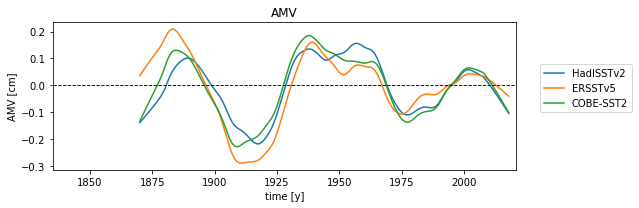

In [26]:
fig.plot_df_timeseries(AMV_data_31, ylabel = 'AMV [cm]', title = 'AMV', window = 31)



#### Perform regression

In [73]:
results_era5_31, timeseries_era5_31 = regr.lagged_regression(AMV_data_31, df_era5_31)
results_20cr_31, timeseries_20cr_31 = regr.lagged_regression(AMV_data_31, df_20cr_31)

#### Show regression results

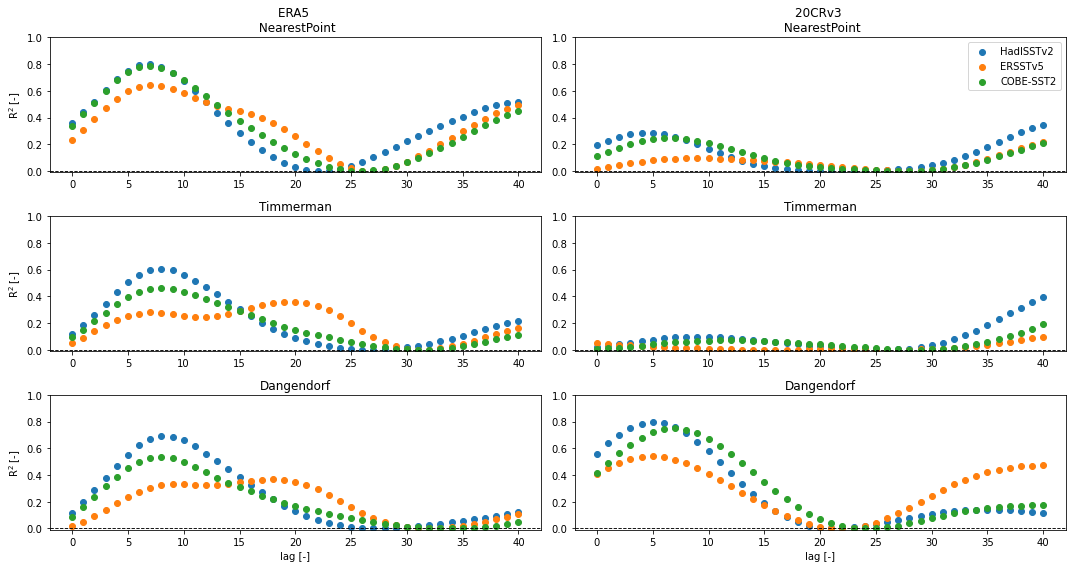

In [74]:
fig.plot_result(results_era5_31, results_20cr_31, 'r$^2$', 'R$^2$ [-]', ymax = 1.0, window = 31)

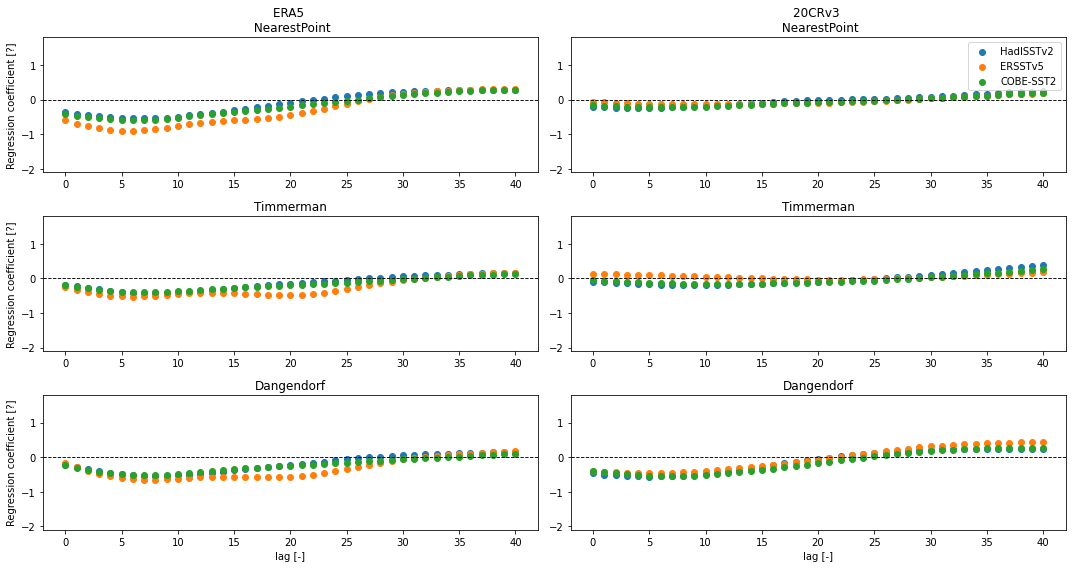

In [75]:
fig.plot_result(results_era5_31, results_20cr_31, 'coef', 'Regression coefficient [?]', ymin = -2.1, ymax = 1.8, window = 31)

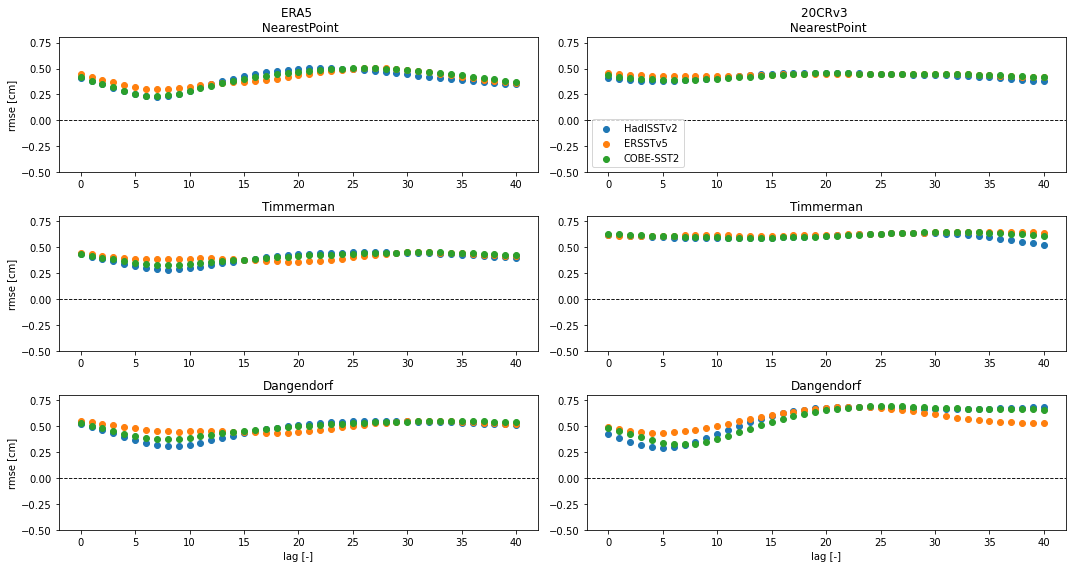

In [76]:
fig.plot_result(results_era5_31, results_20cr_31, 'rmse', 'rmse [cm]', ymin = -0.5, ymax = 0.8, window = 31)

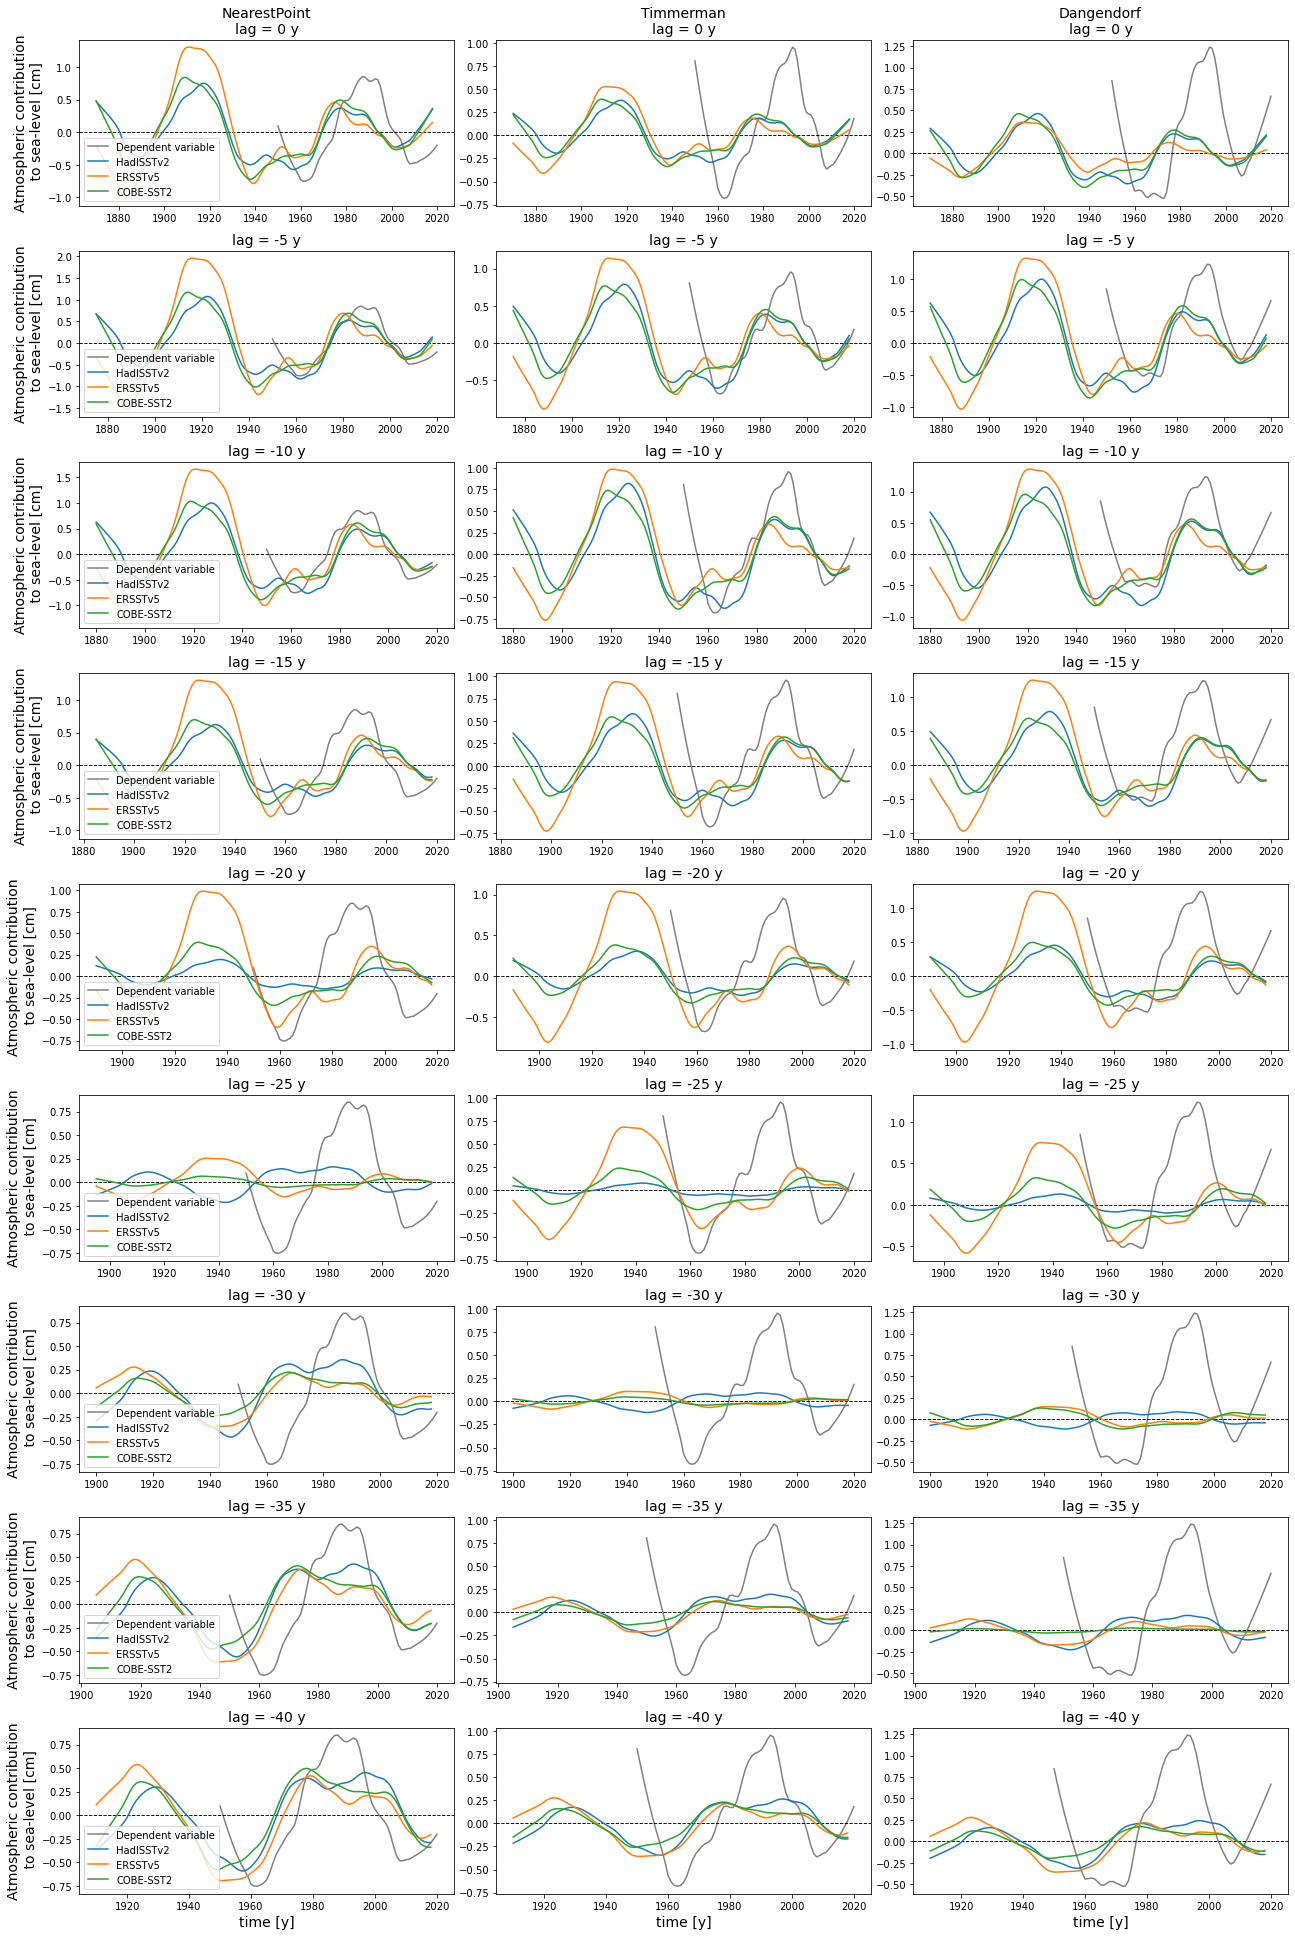

In [80]:
fig.plot_timeseries(timeseries_era5_31, df_era5_31, [0, 5, 10, 15, 20, 25, 30, 35, 40], data_type='era5', window = 31)

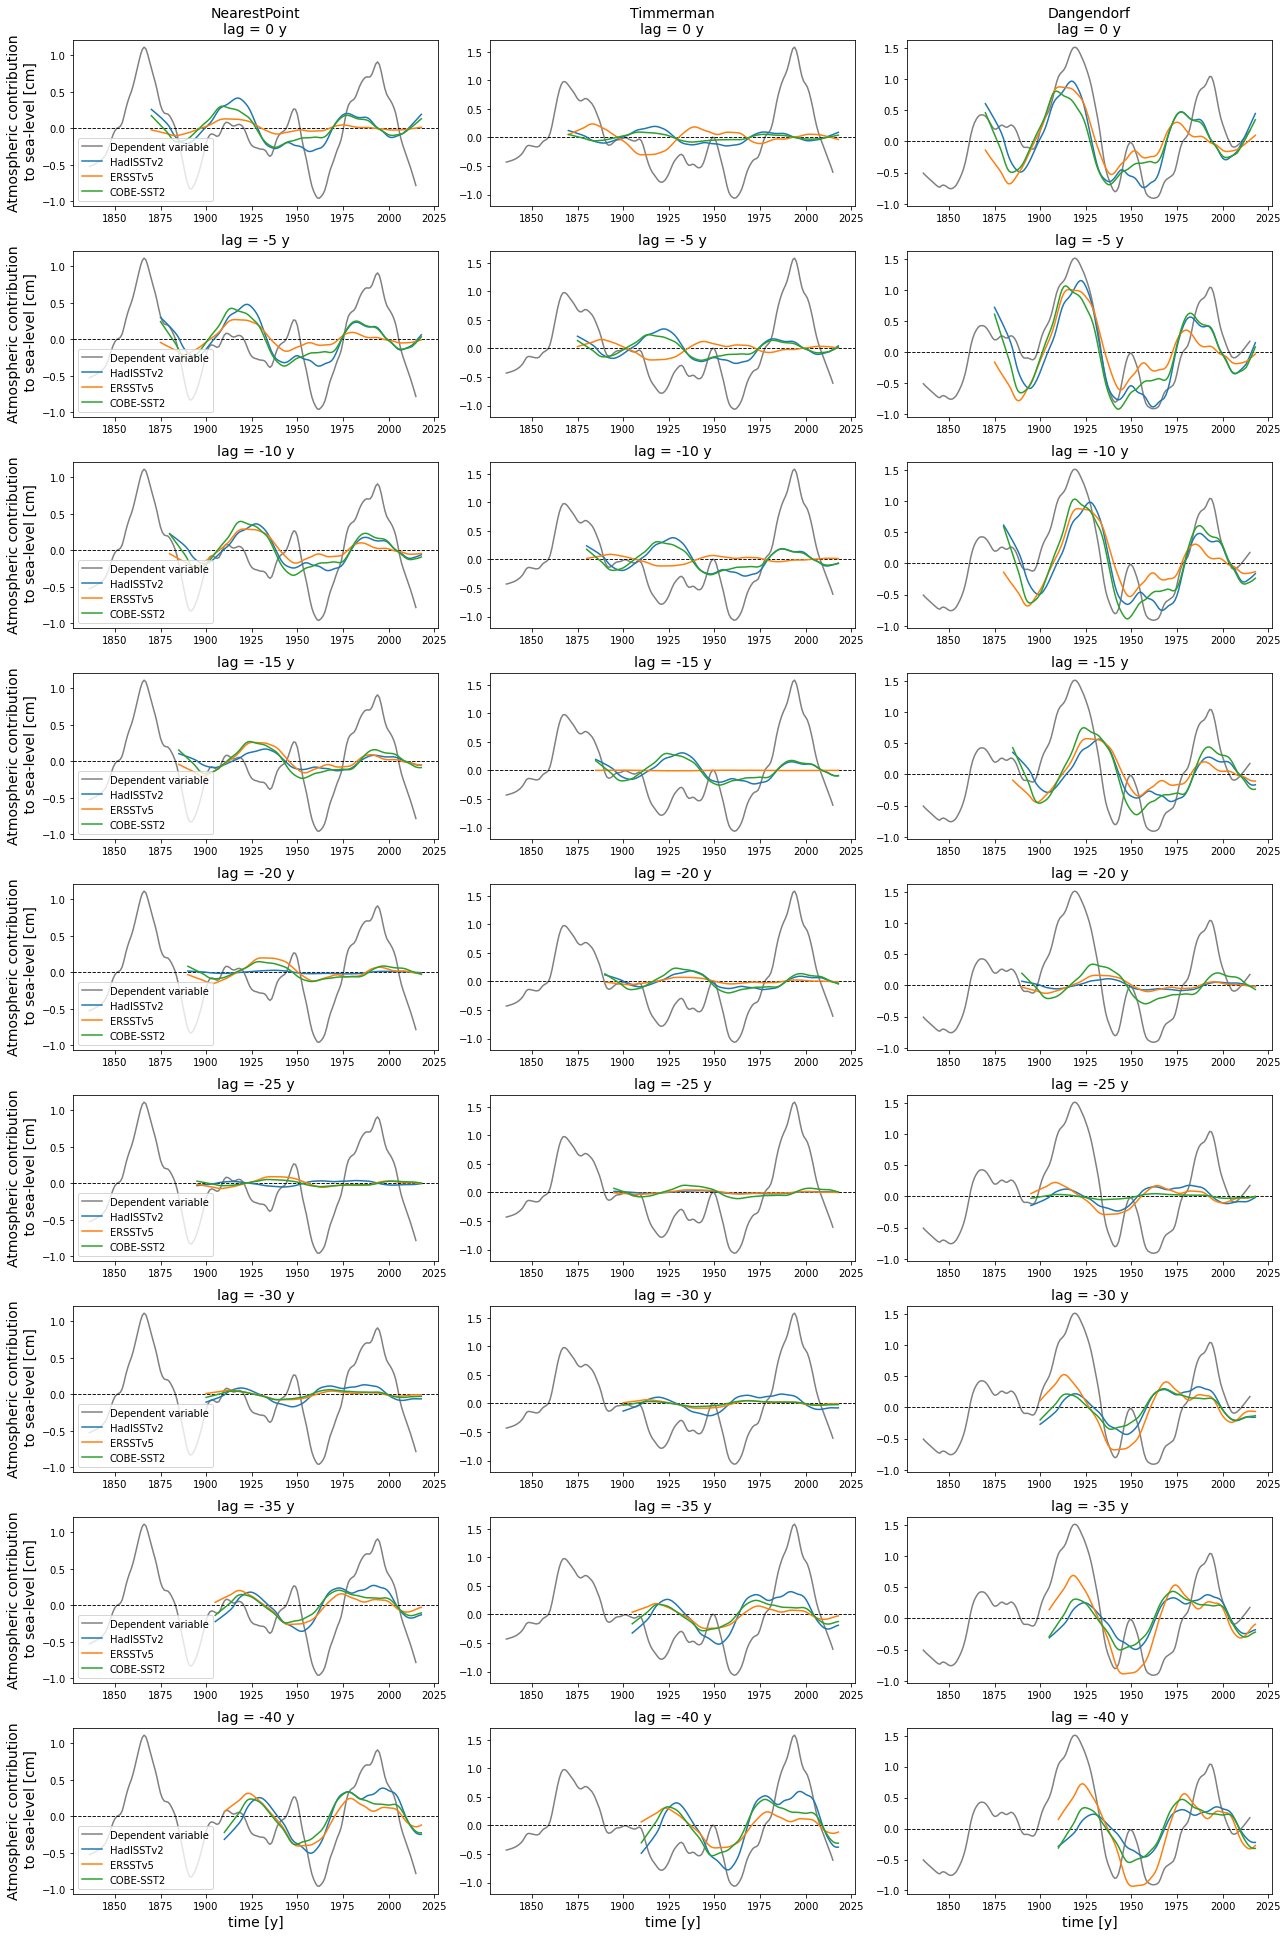

In [81]:
fig.plot_timeseries(timeseries_20cr_31, df_20cr_31, [0, 5, 10, 15, 20, 25, 30, 35, 40], data_type='20cr', window = 31)